In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [18]:
# Split the data into input variables (X) and output variable (y)
data = pd.read_csv ('./data/RCS of ELC resonator based on literature_modified_para_sweep_rearrenged.csv')
X = data.loc[:, ~data.columns.isin(['RCS', 'Frequency / GHz'])]
y = data[['RCS', 'Frequency / GHz']]

In [29]:
data.corr()

,la,lb,l1,w,Frequency / GHz,RCS
la,1.000000e+00,-2.132499e-03,-1.954135e-03,-2.185278e-03,1.870430e-15,0.023124
lb,-2.132499e-03,1.000000e+00,-1.954135e-03,-2.185278e-03,4.547311e-16,0.104610
l1,-1.954135e-03,-1.954135e-03,1.000000e+00,-2.002499e-03,-3.106080e-16,0.004419
w,-2.185278e-03,-2.185278e-03,-2.002499e-03,1.000000e+00,-4.308903e-17,0.001830
Frequency / GHz,1.870430e-15,4.547311e-16,-3.106080e-16,-4.308903e-17,1.000000e+00,0.928005
RCS,2.312424e-02,1.046100e-01,4.418602e-03,1.829528e-03,9.280050e-01,1.000000


In [ ]:
sns.heatmap(data, annot = True)

In [20]:
# Split the dataset into training and test sets
X_train, X_test,y_train,y_test = train_test_split(X, y,  test_size=0.3, random_state=42)

# Normalize the input variables
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (705604, 4)
Test set shape: (302403, 4)


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Instantiate DecisionTreeRegressor

In [ ]:
drc = DecisionTreeRegressor()
drc.fit(X_train,y_train)

In [24]:
y_pred = drc.predict(X_test)

In [25]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:" , mse)

Mean Squared Error: 57.24795360101254


In [27]:
print('{:.4f}'.format(r2_score(y_test, y_pred, multioutput='variance_weighted')))
print('{:.4f}'.format(mean_squared_error(y_test, y_pred, multioutput='uniform_average')))

0.0082
57.2480


Text(0.5, 1.0, 'Scatter Plot of y_train vs y_pred_tr')

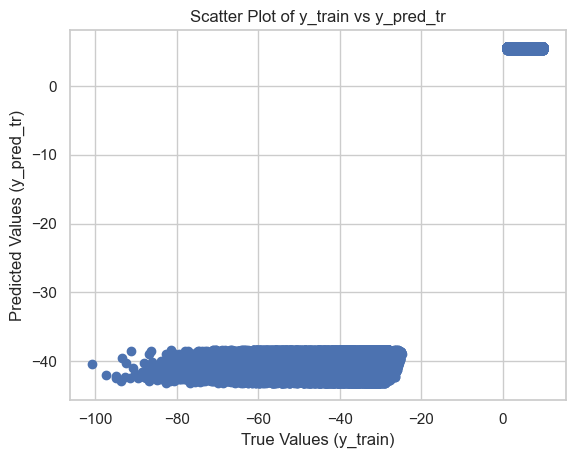

In [28]:
# Visualize y_train vs y_pred
plt.scatter(y_test, y_pred)
plt.xlabel("True Values (y_train)")
plt.ylabel("Predicted Values (y_pred_tr)")
plt.title("Scatter Plot of y_train vs y_pred_tr")

## K nearest neighbors regression

In [31]:
knn_reg = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [32]:
y_pred=knn_reg.predict(X_test)

In [33]:
print('{:.4f}'.format(r2_score(y_test, y_pred, multioutput='variance_weighted')))
print('{:.4f}'.format(mean_squared_error(y_test, y_pred, multioutput='uniform_average')))

-0.1802
68.1205


Text(0.5, 1.0, 'Scatter Plot of y_test vs y_pred')

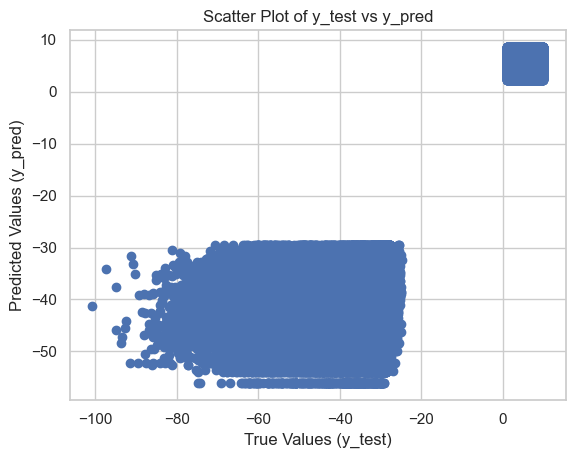

In [34]:
# Visualize y_test vs y_pred
plt.scatter(y_test, y_pred)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot of y_test vs y_pred")

### Random forest regression

In [35]:
forest_reg = RandomForestRegressor(random_state=0, n_estimators=10, n_jobs=-1)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=0)

In [36]:
y_pred=forest_reg.predict(X_test)

In [37]:
print('{:.4f}'.format(r2_score(y_test, y_pred, multioutput='variance_weighted')))
print('{:.4f}'.format(mean_squared_error(y_test, y_pred, multioutput='uniform_average'))) 

0.0080
57.2585


Text(0.5, 1.0, 'Scatter Plot of y_test vs y_pred')

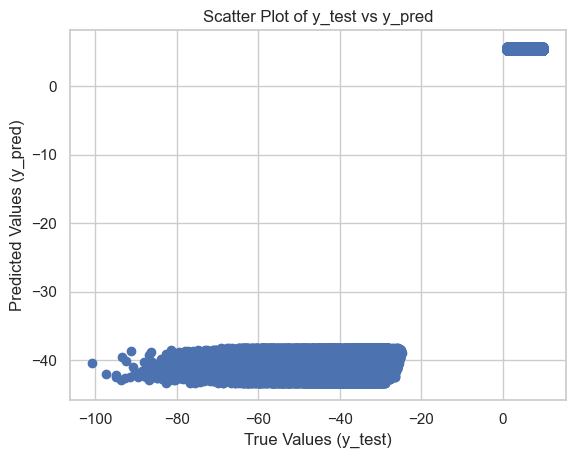

In [38]:
# Visualize y_test vs y_pred
plt.scatter(y_test, y_pred)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot of y_test vs y_pred")